<a href="https://colab.research.google.com/github/Rahee93/data-engineering-zoomcamp-2025-project/blob/main/data_processing_pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Author: Ambarka Raheel
# Data Engineer Zoomcamp Project
# 2025-04-09
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
import os

# Change this path to match where you saved it in your Drive
file_dir = "/content/drive/MyDrive"

# List files
os.listdir(file_dir)


['Brochure.gdoc',
 'Lab 8.zip',
 'Lab 7 Documents.zip',
 'Ambarka Raheel Project_P2.zip',
 '3a3622ac-7a08-469d-873b-02f23f5018ac.pdf',
 'ما هي قوتك الخاصة؟ What is your special power?.gdoc',
 'Scavenger Hunt.gdoc',
 'Untitled document (19).gdoc',
 'Untitled document (18).gdoc',
 'Untitled document (17).gdoc',
 'Untitled document (16).gdoc',
 'To-do list.gsheet',
 'Using Data Analysis_for_Detecting fraud_final assigment.gdoc',
 'Untitled document (15).gdoc',
 'Tools & Technologies Used for Data Analysis-Group 7.gslides',
 'Copy of Tools & Technologies Used for Data Analysis-Group 7.gslides',
 'Elevator Pitch_Ambarka Raheel-self-Introduction in the interveiw .gdoc',
 'Microsoft Azure Module2 Notes.gdoc',
 'Copy of Group Activity: Case Study - Stress Management Template.gslides',
 'JDA Team 2A - Group 7',
 'second stage process for developing and implementing a plan for using generative AI is.gdoc',
 'Untitled document (14).gdoc',
 'Copy of Ind Activity: Goal Setting & Action Plan Templat

In [5]:
import pandas as pd  # Import the pandas library for data manipulation
# Load just a sample of the large CSV to avoid memory crash
# This helps us explore the dataset without loading the whole thing
df = pd.read_csv('/content/drive/MyDrive/US_Accidents_March23.csv', nrows=100000)

# Show shape of the sample
print("Sample shape (rows, columns):", df.shape)


Sample shape (rows, columns): (100000, 46)


In [6]:
# Define the size of each chunk you want to load into memory at a time
chunk_size = 500000  # Can be increased or decreased based on the system's capacity

# Read the CSV file in chunks to prevent memory overload
chunks = pd.read_csv('/content/drive/MyDrive/US_Accidents_March23.csv', chunksize=chunk_size)


# Load only the first chunk into memory for now
df_chunk = next(chunks)

# Check the size of the loaded chunk
print("First chunk shape:", df_chunk.shape)


First chunk shape: (500000, 46)


In [7]:
# Select only spicific columns
selected_columns = ['ID', 'Start_Time', 'End_Time', 'Severity', 'State', 'City', 'Weather_Condition']

# Load only these selected columns from the dataset to save memory
df = pd.read_csv('/content/drive/MyDrive/US_Accidents_March23.csv', usecols=selected_columns)

# Show shape of the loaded data
print("Filtered data shape:", df.shape)

Filtered data shape: (7728394, 7)


In [8]:
# Display the first few rows to understand the structure of the dataset
df.head()

,ID,Severity,Start_Time,End_Time,City,State,Weather_Condition
0,A-1,3,2016-02-08 05:46:00,2016-02-08 11:00:00,Dayton,OH,Light Rain
1,A-2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,Reynoldsburg,OH,Light Rain
2,A-3,2,2016-02-08 06:49:27,2016-02-08 07:19:27,Williamsburg,OH,Overcast
3,A-4,3,2016-02-08 07:23:34,2016-02-08 07:53:34,Dayton,OH,Mostly Cloudy
4,A-5,2,2016-02-08 07:39:07,2016-02-08 08:09:07,Dayton,OH,Mostly Cloudy


In [9]:
# Check number of rows and columns
print("Dataset shape:", df.shape)

# Check data types and non-null counts
df.info()

Dataset shape: (7728394, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 7 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   ID                 object
 1   Severity           int64 
 2   Start_Time         object
 3   End_Time           object
 4   City               object
 5   State              object
 6   Weather_Condition  object
dtypes: int64(1), object(6)
memory usage: 412.7+ MB


In [10]:
# See which columns have missing data
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print("Columns with missing values:\n", missing)

Columns with missing values:
 Weather_Condition    173459
City                    253
dtype: int64


In [11]:
# Drop rows where either 'City' or 'Weather_Condition' is missing
df = df.dropna(subset=['City', 'Weather_Condition'])

# Check shape again
print("Shape after dropping rows with missing values:", df.shape)


Shape after dropping rows with missing values: (7554693, 7)


In [12]:
# Remove duplicates to ensure clean data
df = df.drop_duplicates()

print("Shape after dropping duplicates:", df.shape)


Shape after dropping duplicates: (7554693, 7)


In [13]:
# Convert 'Start_Time' and 'End_Time' to datetime format, handling milliseconds
df['Start_Time'] = pd.to_datetime(df['Start_Time'], format='%Y-%m-%d %H:%M:%S.%f', errors='coerce')
df['End_Time'] = pd.to_datetime(df['End_Time'], format='%Y-%m-%d %H:%M:%S.%f', errors='coerce')

# Create a new column for accident duration in minutes
df['Duration_Minutes'] = (df['End_Time'] - df['Start_Time']).dt.total_seconds() / 60.0


In [14]:
# See types of columns and non-null counts
df.info()

# Summary statistics (numerical columns)
df.describe()

# Check for duplicates
print("Duplicates:", df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 7554693 entries, 0 to 7728393
Data columns (total 8 columns):
 #   Column             Dtype         
---  ------             -----         
 0   ID                 object        
 1   Severity           int64         
 2   Start_Time         datetime64[ns]
 3   End_Time           datetime64[ns]
 4   City               object        
 5   State              object        
 6   Weather_Condition  object        
 7   Duration_Minutes   float64       
dtypes: datetime64[ns](2), float64(1), int64(1), object(4)
memory usage: 518.7+ MB
Duplicates: 0


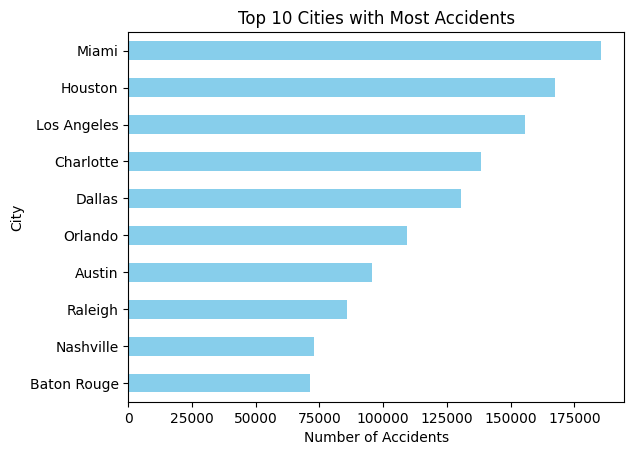

In [15]:
import matplotlib.pyplot as plt  # Import the pyplot module for plotting


# Get the top 10 cities with the most accidents
top_cities = df['City'].value_counts().head(10)

# Create a horizontal bar plot
top_cities.plot(
    kind='barh',  # Specify the plot type as horizontal bar plot
    title='Top 10 Cities with Most Accidents',  # Set the title of the plot
    color='skyblue'  # Set the color of the bars
)

# Add labels and customize the plot
plt.xlabel('Number of Accidents')  # Label the x-axis
plt.gca().invert_yaxis()  # Invert the y-axis to show the city with the most accidents at the top
plt.show()  # Display the plot

In [16]:
# Convert the 'Start_Time' column to datetime objects if it's not already
df['Start_Time'] = pd.to_datetime(df['Start_Time'])

# Extract the hour of the day from the 'Start_Time' and create a new 'Hour' column
df['Hour'] = df['Start_Time'].dt.hour

# Extract the day of the week (0=Monday, 6=Sunday) and create a new 'DayOfWeek' column
df['DayOfWeek'] = df['Start_Time'].dt.dayofweek  # 0=Monday

# Extract the month and create a new 'Month' column
df['Month'] = df['Start_Time'].dt.month


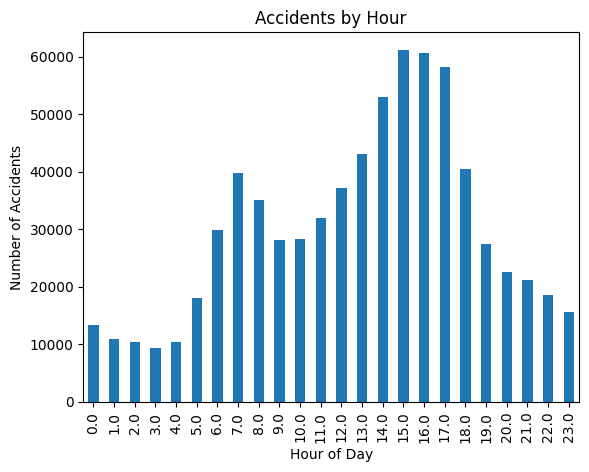

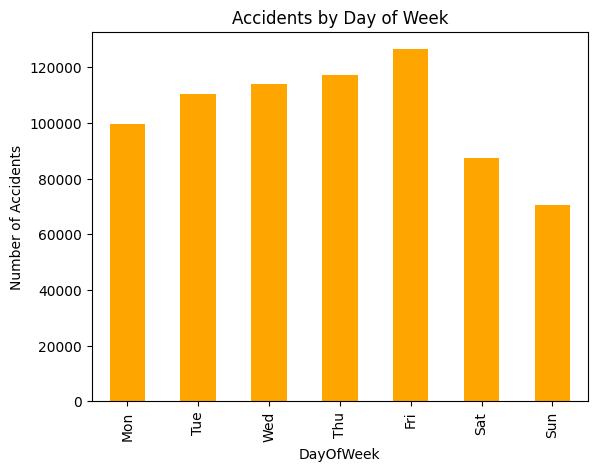

In [17]:
# Accidents by hour of day
# Display the plot using `plt.show()`
df['Hour'].value_counts().sort_index().plot(kind='bar', title='Accidents by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.show()

# Accidents by day of week
# Create a list of day labels for the plot: Monday to Sunday
day_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# 1. Create a bar plot of the accident counts per day using `plot(kind='bar')`
# 2. Set the title of the plot to 'Accidents by Day of Week'
# 3. Set the color of the bars to orange
df['DayOfWeek'].value_counts().sort_index().plot(kind='bar', title='Accidents by Day of Week', color='orange')

# Set the x-axis ticks to represent the days of the week (0-6) and label them with the `day_labels` list
plt.xticks(ticks=range(7), labels=day_labels)

# Label the y-axis as 'Number of Accidents'
plt.ylabel('Number of Accidents')
plt.show() # Display the plot using `plt.show()`

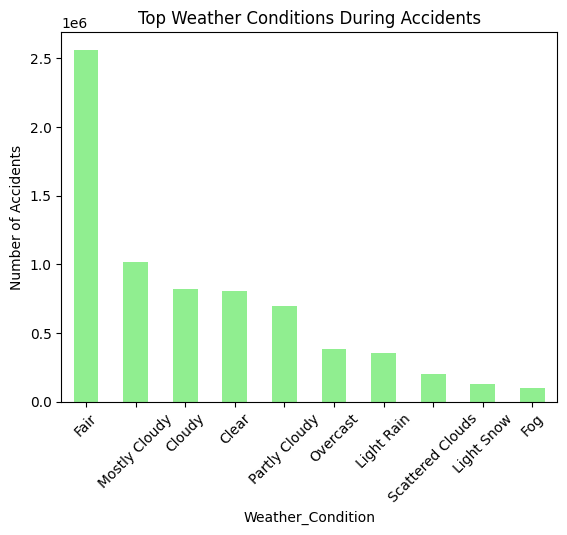

In [18]:
# Count occurrences of each weather condition and get the top 10
weather_counts = df['Weather_Condition'].value_counts().head(10)

# Create a bar plot of the top 10 weather conditions
weather_counts.plot(kind='bar', color='lightgreen')

# Set the title of the plot
plt.title("Top Weather Conditions During Accidents")

# Label the y-axis
plt.ylabel("Number of Accidents")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()


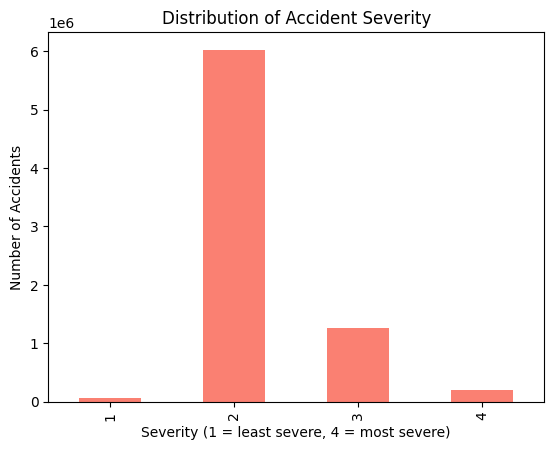

In [19]:
# Create a bar plot to visualize the distribution of accident severity
df['Severity'].value_counts().sort_index().plot(kind='bar', color='salmon')

# Set the title of the plot
plt.title("Distribution of Accident Severity")

# Label the x-axis and explain the severity levels
plt.xlabel("Severity (1 = least severe, 4 = most severe)")

# Label the y-axis to show the count of accidents
plt.ylabel("Number of Accidents")

# Display the plot
plt.show()

In [20]:
#Saving my cleaned data into cleaned_accidents.csv file
df.to_csv('cleaned_accidents.csv', index=False)


In [31]:
import os
os.listdir()


['.config', 'cleaned_accidents.csv', 'drive', 'sample_data']

In [21]:
# Import the Google Cloud Storage library
from google.cloud import storage

# Create a client object to interact with Google Cloud Storage
client = storage.Client()

# Get a reference to the specific bucket where the file will be uploaded
# Replace 'final_project_raheel' with your actual bucket name
bucket = client.bucket('final_project_raheel')

# Create a blob object representing the file to be uploaded
# 'cleaned_accidents.csv' is the name of the file in the bucket
blob = bucket.blob('cleaned_accidents.csv')

# Upload the local file 'cleaned_accidents.csv' to the bucket
blob.upload_from_filename('cleaned_accidents.csv')

# Print a message to confirm the successful upload
print("Upload successful")


Upload successful


In [22]:
# Import necessary libraries for Google Colab authentication and BigQuery
from google.colab import auth
from google.cloud import bigquery

# Authenticate the user to access Google Cloud resources
auth.authenticate_user()

# **1. Set up BigQuery Client**
project_id = 'myproject-451914' # Define the project ID
# Create a BigQuery client object
bq_client = bigquery.Client(project=project_id)

# **2. Define dataset and table details**
dataset_id = f"{project_id}.traffic_data"
# Specify the table name where data will be loaded
table_id = 'cleaned_accidents'

# **3. Configure the load job**
# Create a LoadJobConfig object with settings for loading data
job_config = bigquery.LoadJobConfig(
    source_format=bigquery.SourceFormat.CSV,  # Specify the source file format as CSV
    autodetect=True  # Enable automatic schema detection from the CSV file
)

# **4. Load the data into BigQuery**
# Open the local CSV file ('cleaned_accidents.csv') in read binary ('rb') mode
with open('cleaned_accidents.csv', 'rb') as source_file:
    # Create a load job to load data from the file into the BigQuery table
    load_job = bq_client.load_table_from_file(
        source_file,  # The source file to load data from
        f"{dataset_id}.{table_id}",  # The destination BigQuery table (dataset.table)
        job_config=job_config  # Apply the load job configuration
    )

# **5. Wait for the job to complete and print confirmation**
load_job.result()  # Wait for the load job to finish
print("Table loaded successfully")  # Print a message upon successful completion

Table loaded successfully
